# Sentiment Analysis of Wine Data
* Can we use Machine Learning to predict the quality of wine based on it's description?
* Dataset: https://www.kaggle.com/zynicide/wine-reviews

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Clean Data
* Read CSV for starting data
* drop nulls and duplicates from description and points columns
* drop columns down to description and points

In [41]:
# Read CSV
data = pd.read_csv("winemag-data_first150k.csv")
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
# drop nulls and duplicates from description and points columns
clean_data = data[data.duplicated('description', keep=False)]
clean_data.dropna(subset=['description', 'points'])

# Print new length of data
print(len(clean_data))


92393


In [4]:
clean_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
29,29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
60,60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,NaN,Malbec,Matias Riccitelli
61,61,Australia,Moorooduc's estate Pinot Noir is a solid value...,NaN,91,36.0,Victoria,Mornington Peninsula,NaN,Pinot Noir,Moorooduc
62,62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,NaN,Malbec,Navarro Correas


In [5]:
#drop columns down to description and points
description_points_df = clean_data[['description','points']]
description_points_df.head()

,description,points
25,"Yields were down in 2015, but intensity is up,...",94
29,This standout Rocks District wine brings earth...,94
60,"Concentrated, ripe blackberry and cassis aroma...",91
61,Moorooduc's estate Pinot Noir is a solid value...,91
62,Smoky aromas of fresh-cut wood blend with berr...,91


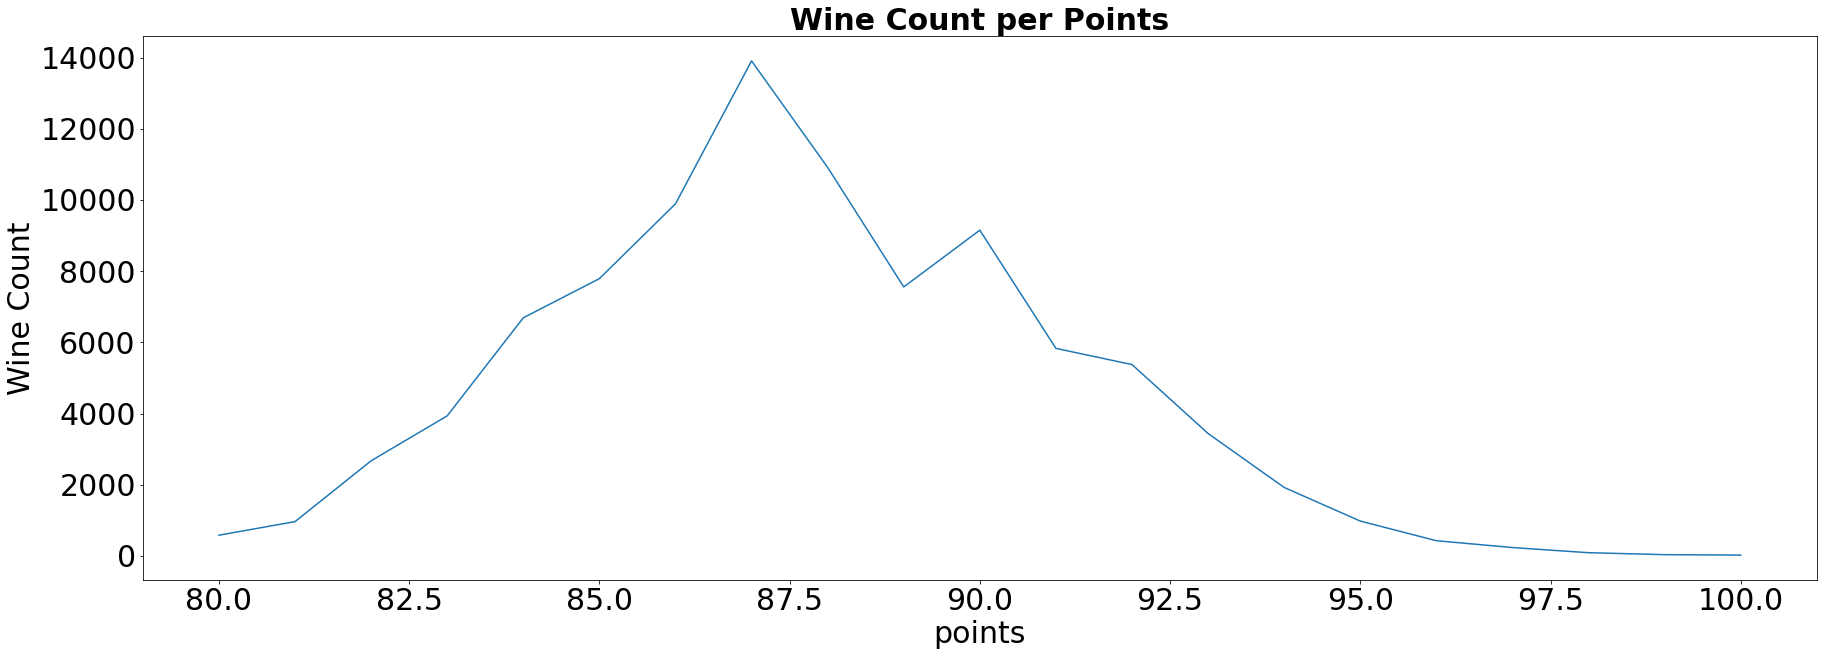

In [25]:
# plot the wine count per points
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=30) 
plt.xticks(rotation=45)
plt.yticks(fontsize=30) 
ax.set_title('Wine Count per Points', fontweight="bold", size=30)
ax.set_ylabel('Wine Count', fontsize = 30)
ax.set_xlabel('Points', fontsize = 30) 
description_points_df.groupby(['points']).count()['description'].plot(ax=ax)#kind=bar for a bar chart
plt.show()

# Description length vs points
* Add description length column

In [8]:
# Add description length column
description_points_df = description_points_df.assign(description_length = description_points_df['description'].apply(len))
description_points_df.head()

,description,points,description_length
25,"Yields were down in 2015, but intensity is up,...",94,215
29,This standout Rocks District wine brings earth...,94,333
60,"Concentrated, ripe blackberry and cassis aroma...",91,242
61,Moorooduc's estate Pinot Noir is a solid value...,91,315
62,Smoky aromas of fresh-cut wood blend with berr...,91,229


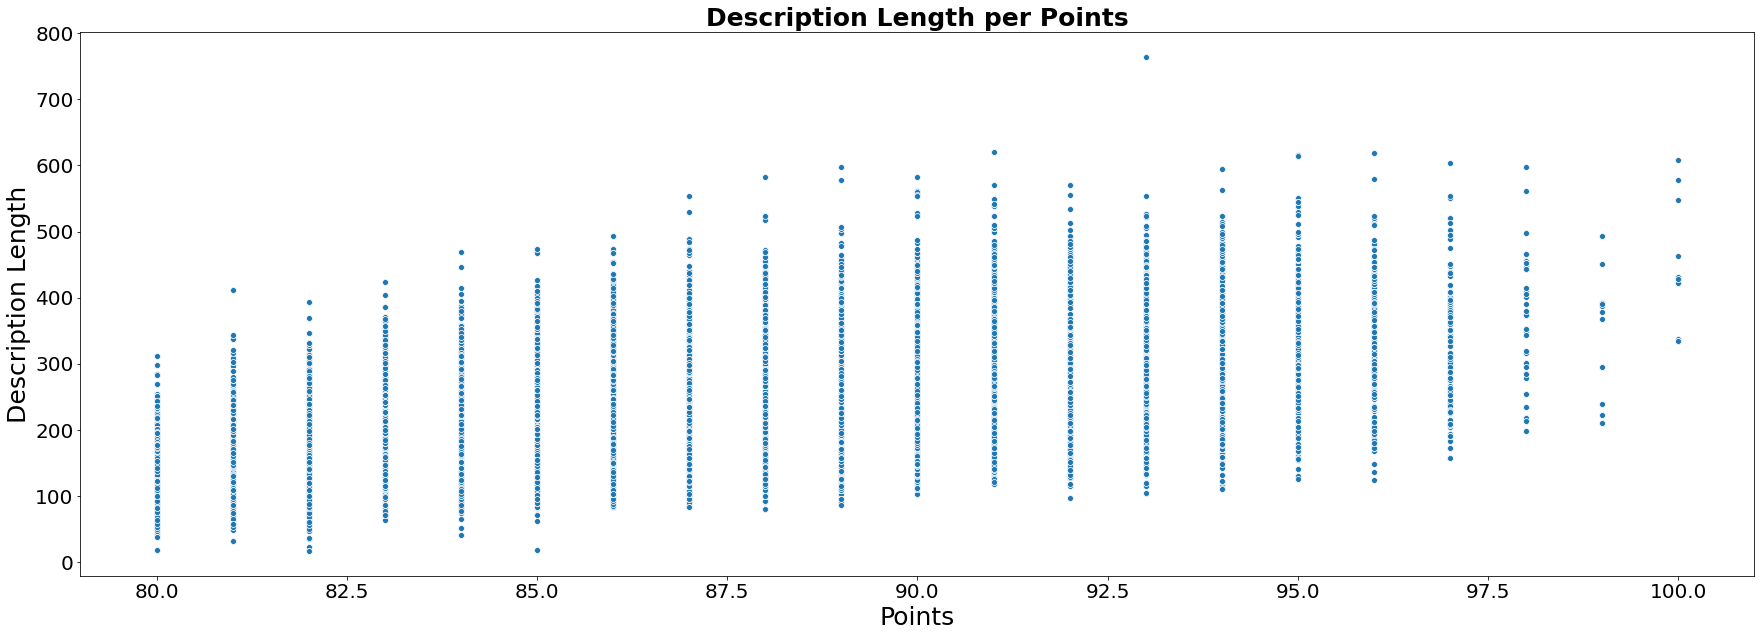

In [20]:
# plot correlation of description length to points
fig, ax = plt.subplots(figsize=(30,10))
sns.scatterplot(x='points', y='description_length', data=description_points_df)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Points', fontweight="bold", size=25) 
ax.set_ylabel('Description Length', fontsize = 25) 
ax.set_xlabel('Points', fontsize = 25) 
plt.show()

# K.I.S.S
* Keep it simple stupid

In [31]:
# simplify the points data
def getQuality(points):
  if points < 84:
    return '1'
  elif points >= 84 and points < 88:
    return '2'
  elif points >= 88 and points < 92:
    return '3'
  elif points >= 92 and points < 96:
    return '4'
  else:
    return '5'

# Add kiss_points column
description_points_df = description_points_df.assign(kiss_points = description_points_df['points'].apply(getQuality))
description_points_df.head()
    

,description,points,description_length,kiss_points
25,"Yields were down in 2015, but intensity is up,...",94,215,4
29,This standout Rocks District wine brings earth...,94,333,4
60,"Concentrated, ripe blackberry and cassis aroma...",91,242,3
61,Moorooduc's estate Pinot Noir is a solid value...,91,315,3
62,Smoky aromas of fresh-cut wood blend with berr...,91,229,3


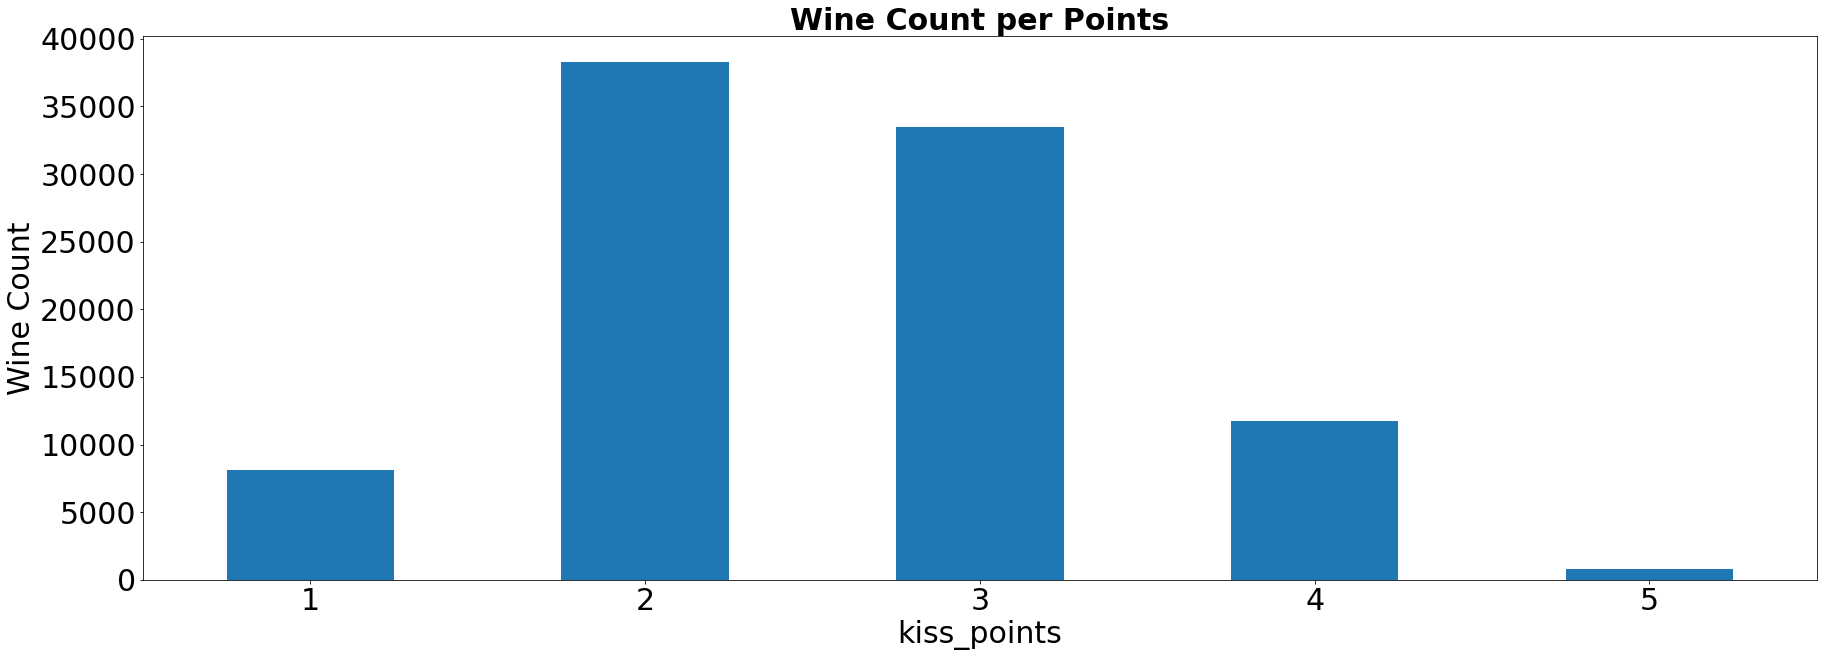

In [40]:
# plot the wine count per points
fig, ax = plt.subplots(figsize=(30,10))
plt.xticks(fontsize=30) 
plt.yticks(fontsize=30) 
ax.set_title('Wine Count per Points', fontweight="bold", size=30)
ax.set_ylabel('Wine Count', fontsize = 30)
ax.set_xlabel('Points', fontsize = 30) 
description_points_df.groupby(['kiss_points']).count()['description'].plot(ax=ax, kind = 'bar')#kind=bar for a bar chart
plt.xticks(rotation=0)
plt.show()